# Chapter 6.1

### Analysis of Yeast Cell Cycle Data

In [2]:
#import packages
import numpy as np
import pandas as pd
from numpy import diag, linalg as LA
import seaborn as sns
import matplotlib.pyplot as plt

### Generate Heatmaps of coefficient estimates. 
#### (Chapter 6.1 Figure 2)

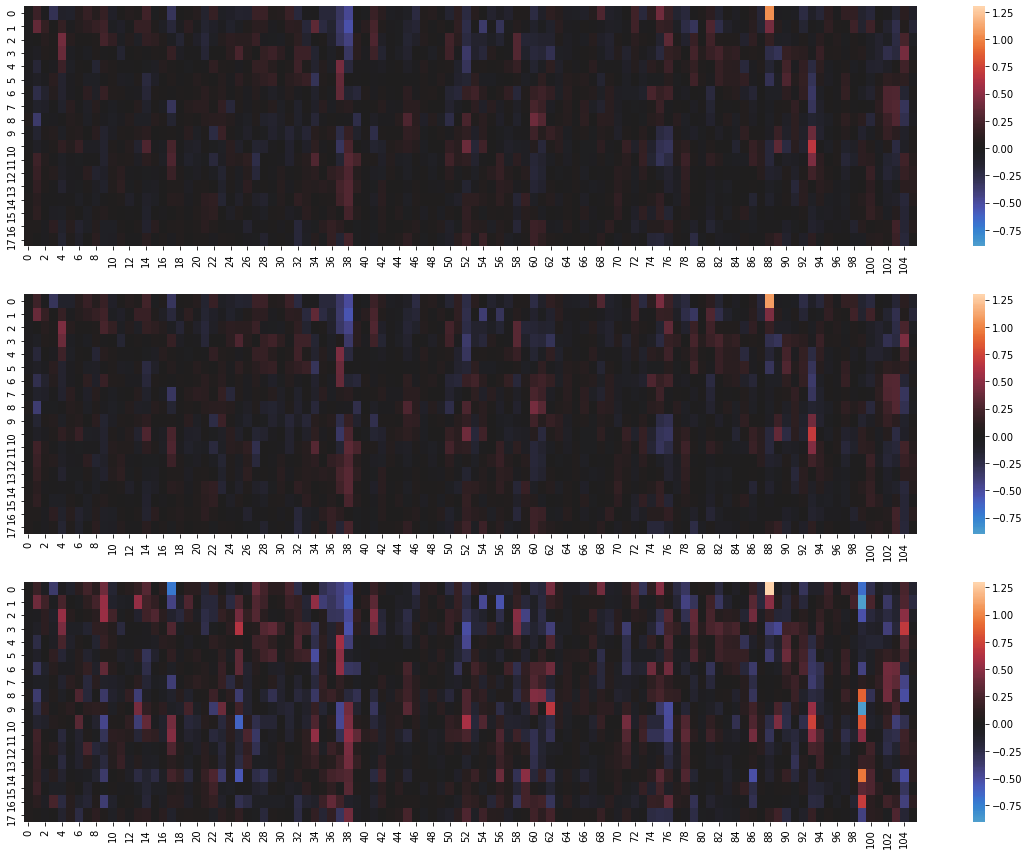

In [6]:
#read in the data
X=pd.read_csv("X_yeast.csv", index_col=[0])
Y=pd.read_csv("Y_yeast.csv", index_col=[0])

N_Obs=X.shape[0]
p=Y.shape[1]
q=X.shape[1]

#center X and Y
X_center=X.apply(lambda x: x-x.mean())
X_center=np.array(X_center.T)
#print(X_center.shape)
Y_center=Y.apply(lambda x: x-x.mean())
Y_center=np.array(Y_center.T)
#print(Y_center.shape)

#calculate the empirical covariance of X*
empi_cov_X=X_center@X_center.T/N_Obs

#Naive estimate
B_lse=(Y_center@X_center.T)/N_Obs@LA.inv(empi_cov_X)

#plot heatmap of B_hat_naive
fig, ax =plt.subplots(3,1, figsize=(20, 15))
sns.heatmap(B_lse, vmin = -0.9, vmax = 1.3, center=0,   
            ax=ax[0])

#set the measurement error level
error_level_index1=0.05

#case 1. the cov of error is related to the cov of true x
Sigma_Ex=error_level_index1*empi_cov_X
Sigma_trueX=(1-error_level_index1)*empi_cov_X
#calculate the correction term for case 1
K1=empi_cov_X@LA.inv(Sigma_trueX)
#calculate the B_hat_corrected for case 1
B_correct1=B_lse@K1
#generate heatmap of B_hat_corrected for case 1
sns.heatmap(B_correct1, vmin = -0.9, vmax = 1.3, center=0,  ax=ax[1])

#case 2. the cov of error is diagonal
cov_error_vec=empi_cov_X.diagonal()*error_level_index1
Sigma_Ex=np.eye(q)*np.diag(cov_error_vec)
Sigma_trueX=empi_cov_X-Sigma_Ex
#calculate the correction term
K3=empi_cov_X@LA.inv(Sigma_trueX)
#calculate the B_hat_corrected for case 2
B_correct3=B_lse@K3
#generate heatmap for B_hat_corrected for case 2
sns.heatmap(B_correct3, vmin = -0.9, vmax = 1.3,center=0,   ax=ax[2])
plt.show()

### Generate curves of Frobenius norm vs measurement error level
#### (Chapter 6.1 Figure 1)

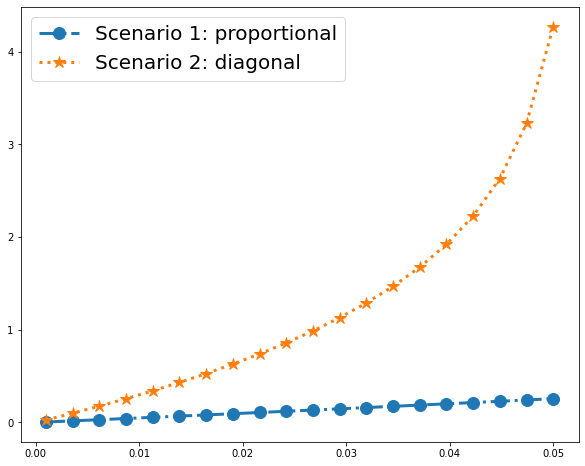

In [7]:
#plot curves for scenarios 1 and 2 with xi between 0.001 and 0.05
empi_cov_X=X_center@X_center.T/N_Obs
#Naive estimate
B_lse=(Y_center@X_center.T)/N_Obs@LA.inv(empi_cov_X)
sc1_norm_list=[]
sc2_norm_list=[]
for xi in np.linspace(start=0.001, stop=0.05, num=20):
    #Scenario 1. the cov of error is proportional to the cov of true x
    Sigma_Ex=xi*empi_cov_X
    Sigma_trueX=(1-xi)*empi_cov_X

    K1=empi_cov_X@LA.inv(Sigma_trueX)

    B_correct1=B_lse@K1
    sc1_norm_list.append(LA.norm(B_correct1-B_lse))
    
    #Scenario 2. Diagonal measurement error cov structure
    cov_error_vec=empi_cov_X.diagonal()*xi
    Sigma_Ex=np.eye(q)*np.diag(cov_error_vec)
    Sigma_trueX=empi_cov_X-Sigma_Ex

    K3=empi_cov_X@LA.inv(Sigma_trueX)

    B_correct3=B_lse@K3
    sc2_norm_list.append(LA.norm(B_correct3-B_lse))

fig=plt.subplots(figsize=(10, 8))
x=np.linspace(start=0.001, stop=0.05, num=20)    
plt.plot(x, sc1_norm_list, marker="o", markersize=12,linestyle="-.", linewidth=3,label="Scenario 1: proportional")
plt.plot(x, sc2_norm_list,marker="*",markersize=12, linestyle=":", linewidth=3,label="Scenario 2: diagonal")
plt.legend(loc='best', fontsize=20)
#plt.xlabel("$\xi$")
#plt.ylabel("$\|\hat{B}_{x^*c}-\hat{B}_{x^*}\|$")
plt.show()